# California Preterm and Very Preterm Births (2010-2018)

background info and definitions

# Data Understanding

## Initial imports and exploration

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/preterm-and-very-preterm-births-by-raceethnicity-2010-2018.csv')

In [11]:
df.shape

(162, 8)

In [8]:
df.head()

,Year,Race/Ethnicity,Birth Type,Total Births,Events,Percent,Upper 95% CI,Lower 95% CI
0,2010,African-American,Preterm Births,27634,3441,12.5,12.8,12.1
1,2010,African-American,Very Preterm Births,27634,731,2.6,2.8,2.5
2,2011,African-American,Preterm Births,26991,3241,12.0,12.4,11.6
3,2011,African-American,Very Preterm Births,26991,729,2.7,2.9,2.5
4,2012,African-American,Preterm Births,26446,3226,12.2,12.6,11.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            162 non-null    int64  
 1   Race/Ethnicity  162 non-null    object 
 2   Birth Type      162 non-null    object 
 3   Total Births    162 non-null    int64  
 4   Events          162 non-null    int64  
 5   Percent         162 non-null    float64
 6   Upper 95% CI    162 non-null    float64
 7   Lower 95% CI    162 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 10.2+ KB


In [10]:
df.describe()

,Year,Total Births,Events,Percent,Upper 95% CI,Lower 95% CI
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2014.000000,108951.679012,5347.037037,5.545062,5.693827,5.438889
std,2.589995,154352.758040,10129.296371,4.141564,4.240938,4.113442
min,2010.000000,1487.000000,14.000000,0.800000,0.500000,0.700000
25%,2012.000000,9286.000000,190.250000,1.300000,1.300000,1.300000
50%,2014.000000,25160.000000,1097.500000,5.300000,5.150000,5.350000
75%,2016.000000,138373.000000,5566.000000,8.975000,8.875000,8.675000
max,2018.000000,508748.000000,43527.000000,12.700000,13.400000,12.700000


In [66]:
df.isna().sum()

Year              0
Race/Ethnicity    0
Birth Type        0
Total Births      0
Events            0
Percent           0
Upper 95% CI      0
Lower 95% CI      0
dtype: int64

In [73]:
df['Race/Ethnicity'].unique()

array(['African-American', 'American Indian', 'Asian', 'Hispanic',
       'Multi-Race', 'Pacific Islander', 'Unknown', 'White', 'TOTAL',
       'White/Other'], dtype=object)

## Exploring trends in total preterm & very preterm births

In [18]:
df_total_births = df[['Year', 'Race/Ethnicity', 'Total Births']]
df_total_births.head()

,Year,Race/Ethnicity,Total Births
0,2010,African-American,27634
1,2010,African-American,27634
2,2011,African-American,26991
3,2011,African-American,26991
4,2012,African-American,26446


In [20]:
df_total_events = df[['Year', 'Birth Type', 'Race/Ethnicity', 'Events']]
df_total_events.head()

,Year,Birth Type,Race/Ethnicity,Events
0,2010,Preterm Births,African-American,3441
1,2010,Very Preterm Births,African-American,731
2,2011,Preterm Births,African-American,3241
3,2011,Very Preterm Births,African-American,729
4,2012,Preterm Births,African-American,3226


In [23]:
df_preterm = df_total_events.loc[df_total_events['Birth Type'] == 'Preterm Births']
df_preterm.head()

,Year,Birth Type,Race/Ethnicity,Events
0,2010,Preterm Births,African-American,3441
2,2011,Preterm Births,African-American,3241
4,2012,Preterm Births,African-American,3226
6,2013,Preterm Births,African-American,3075
8,2010,Preterm Births,American Indian,191


In [34]:
df_preterm['Events'].min()

154

In [35]:
df_preterm['Events'].max()

43527

### African-American

In [28]:
df_pt_aa = df_preterm.loc[df_preterm['Race/Ethnicity'] == 'African-American']
df_pt_aa.head()

,Year,Birth Type,Race/Ethnicity,Events
0,2010,Preterm Births,African-American,3441
2,2011,Preterm Births,African-American,3241
4,2012,Preterm Births,African-American,3226
6,2013,Preterm Births,African-American,3075
72,2014,Preterm Births,African-American,3100


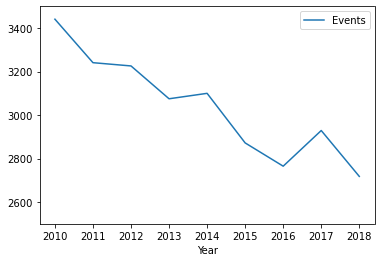

In [36]:
df_pt_aa.plot(x='Year', y='Events', ylim=(2500,3500));

In [61]:
# creating a function for repeating simple plots

def plot(df):
    df.plot(x='Year', y='Events')
    plt.ylabel('Preterm Events')

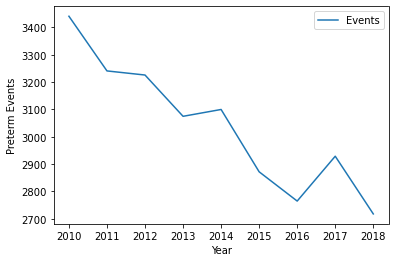

In [62]:
plot(df_pt_aa)

In [24]:
df_very_preterm = df_total_events.loc[df_total_events['Birth Type'] == 'Very Preterm Births']
df_very_preterm.head()

,Year,Birth Type,Race/Ethnicity,Events
1,2010,Very Preterm Births,African-American,731
3,2011,Very Preterm Births,African-American,729
5,2012,Very Preterm Births,African-American,748
7,2013,Very Preterm Births,African-American,692
9,2010,Very Preterm Births,American Indian,21


In [64]:
df_vpt_aa = df_very_preterm.loc[df_very_preterm['Race/Ethnicity'] == 'African-American']
df_vpt_aa.head()

,Year,Birth Type,Race/Ethnicity,Events
1,2010,Very Preterm Births,African-American,731
3,2011,Very Preterm Births,African-American,729
5,2012,Very Preterm Births,African-American,748
7,2013,Very Preterm Births,African-American,692
73,2014,Very Preterm Births,African-American,773


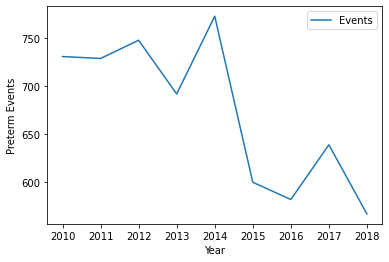

In [65]:
plot(df_vpt_aa)